# HealtNotebook 



Welcome to HeathNotebook! <br> This is a notebook for health data analysis.
First we will ask you to enter your name and age and then we will ask more about your current health.
Depending on where you are running this notebook, when you run the next cell, you will be prompted to write your name and age.

In [13]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

data = pd.read_csv("./covid19_dataset/covid_data_preprocessed.csv")
data.columns


Index(['id', 'Steps', 'Socialize (min)', 'Leave house', 'People contact',
       'Alcohol (bev)', 'Exercise', 'Stress', 'Worry (scale)',
       'Worry (finances)', 'Worry (health)', 'PHQ9', 'PANAS (NA)',
       'PANAS (PA)', 'Isolation', 'Latency', 'Wakes', 'Sleeptime (h)'],
      dtype='object')

In [9]:
name_value = ""
age_value = 0
hours_slept_value = 0.0
sleep_quality_value = ""
stress_value = ""
exercise_value = ""
daily_steps_value = 0
alcohol_consumption_value = 0.0
food_value = ""



def labeled_widget(label, widget):
    return widgets.VBox([widgets.Label(label), widget], layout=widgets.Layout(align_items='stretch'))

name = widgets.Text(
    value='',
    placeholder='Type something',
    disabled=False)

age = widgets.IntText(
    value=0, 
    placeholder='Type something',
    disabled=False,
    min=0)

hours_slept = widgets.FloatText(
    value=0.0,
    placeholder='Type something',
    disabled=False,
    min=0.0,)

sleep_quality = widgets.Dropdown(
    options=["1: Yes, almost always", "2: Yes, often", "3: Rarely, or almost never"],
    value="1: Yes, almost always",
    disabled=False)

stress = widgets.Dropdown(
    options=["1", "2", "3", "4", "5", "6", "7"],
    value = "1",
    placeholder='1',
    disabled=False)

exercise = widgets.Dropdown(
    options=["Yes", "No"],
    value="Yes",
    disabled=False)

daily_steps = widgets.IntText(
    value=0, 
    placeholder=0,
    disabled=False,
    min=0)

alcohol_consumption = widgets.FloatText(
    value=0.0,
    placeholder=0.0,
    disabled=False,
    min=0.0,)

food = widgets.Dropdown(
    options=["1: Never" , "2: Yes, sometimes", "3: Often"],
    value="1: Never",
    disabled=False)


button = widgets.Button(description="Submit")

# Define a function to handle button click event
def on_button_click(b):
    global name_value, age_value, hours_slept_value, sleep_quality_value, \
    stress_value, exercise_value, daily_steps_value, alcohol_consumption_value, food_value

    name_value = name.value
    age_value = age.value
    hours_slept_value = hours_slept.value
    sleep_quality_value = int(sleep_quality.value.split(":")[0])
    stress_value = int(stress.value)
    exercise_value = 1 if exercise.value == "Yes" else 0
    daily_steps_value = daily_steps.value
    alcohol_consumption_value = int(alcohol_consumption.value)
    food_value = int(food.value.split(":")[0])


# Set the function to be called on button click
button.on_click(on_button_click)

# Create labeled widgets
name_labeled = labeled_widget('Name:', name)
age_labeled = labeled_widget('Age:', age)
hours_slept_labeled = labeled_widget('Hours slept on average:', hours_slept)
sleep_quality_labeled = labeled_widget('Do you feel tired:', sleep_quality)
stress_labeled = labeled_widget('Stress, on a scale from 1 to 7:', stress)  # Changed this line
exercise_labeled = labeled_widget('Is exercise part of your daily life:', exercise)  # Changed this line
daily_steps_labeled = labeled_widget('Daily steps:', daily_steps)  # Changed this line
alcohol_consumption_labeled = labeled_widget('Number of alcohol units:', alcohol_consumption)  # Changed this line
food_labeled = labeled_widget('When buying food, do you consider the healthiness of the food:', food)  # Changed this line


display(name_labeled, age_labeled, hours_slept_labeled, sleep_quality_labeled,
        stress_labeled, exercise_labeled, daily_steps_labeled,
        alcohol_consumption_labeled, food_labeled, button)


Button(description='Submit', style=ButtonStyle())

In [15]:
# for testing set the values to the parameters from the form
name_value = "Test"
age_value = 20
hours_slept_value = 8.0
sleep_quality_value = 1
stress_value = 1
exercise_value = 1
daily_steps_value = 10000
alcohol_consumption_value = 0
food_value = 1


Helpful info: <br>
One alcohol unit is around 12g of pure alcohol. <br>


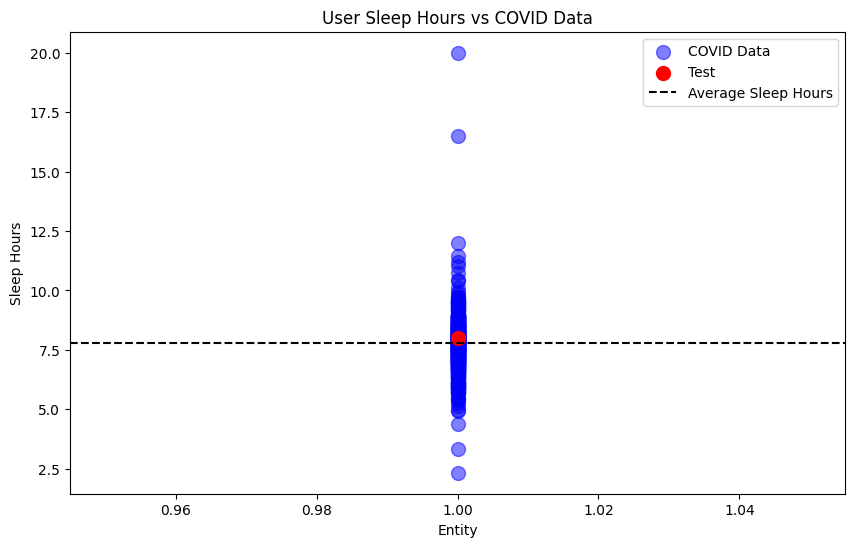

You sleep more than the average person. 
 The difference is 0.21 hours.


In [22]:
user_sleep_hours = hours_slept_value


# Create the plot
plt.figure(figsize=(10, 6))

x_values = np.ones(len(data['Sleeptime (h)']))
plt.scatter(x_values, data['Sleeptime (h)'], color='blue', marker='o', s=100, alpha=0.5, label='COVID Data')

plt.scatter([1], [user_sleep_hours], color='red', marker='o', s=100, label=name_value)

# print average sleep hours as dotted line
plt.axhline(y=data['Sleeptime (h)'].mean(), color='black', linestyle='--', label='Average Sleep Hours')

plt.xlabel('Entity')
plt.ylabel('Sleep Hours')
plt.title('User Sleep Hours vs COVID Data')
plt.legend()

plt.show()

if user_sleep_hours < data['Sleeptime (h)'].mean():
    print("""You sleep less than the average person. Try to sleep more. \n
          The difference is {data['Sleeptime (h)'].mean() - user_sleep_hours} hours.""")
elif user_sleep_hours == data['Sleeptime (h)'].mean():
    print("You sleep the same amount as the average person. Good job!")
else:
    print(f"You sleep more than the average person. \n The difference is {round(user_sleep_hours - data['Sleeptime (h)'].mean(), 2)} hours.")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


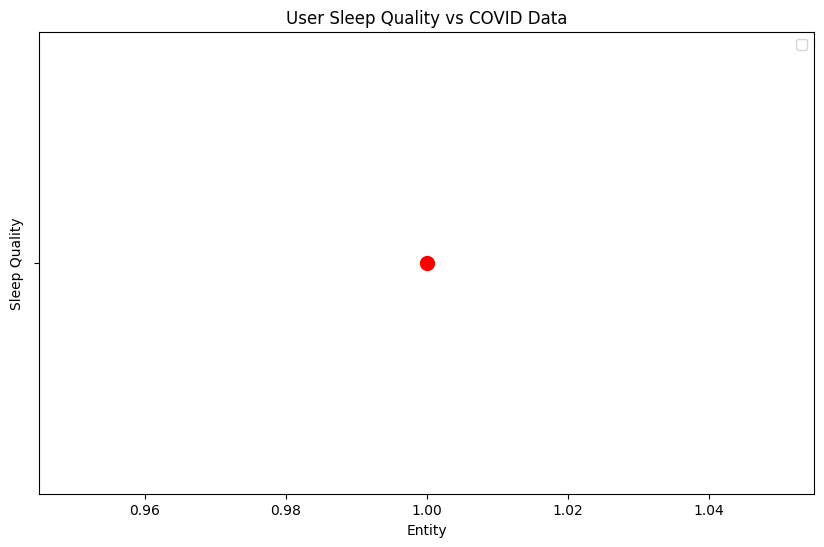

In [11]:
# plot the user's sleep quality vs the average sleep quality of the COVID data

user_sleep_quality = sleep_quality_value

plt.figure(figsize=(10, 6))

#x_values = np.ones(len(data['sleep quality']))

#create sleep quality sample data with values 1, 2, 3
x_values = np.ones(3)
x_values[0] = 1
x_values[1] = 2
x_values[2] = 3


#plt.scatter(x_values, data['sleep quality'], color='blue', marker='o', s=100, alpha=0.5, label='Data')

plt.scatter([1], [user_sleep_quality], color='red', marker='o', s=100, label=name_value)

#plt.axhline(y=data['sleep quality'].mean(), color='black', linestyle='--', label='Average Sleep Quality')

# Add labels and title
plt.xlabel('Entity')
plt.ylabel('Sleep Quality')
plt.title('User Sleep Quality vs COVID Data')
plt.legend()




In [ ]:
#more plots here 
